In [10]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#Now this is the updated cleaned data
file_path = "/Users/JumpMan/Downloads/Python Project/Employee_deep_learning/Churn_Modelling.csv"
df = pd.read_csv(file_path)

# Display the first few rows
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Checking the data

In [11]:
# Display cleaned dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [12]:
#Check Missing Values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [17]:
# Basic statistics
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Visualizing the data

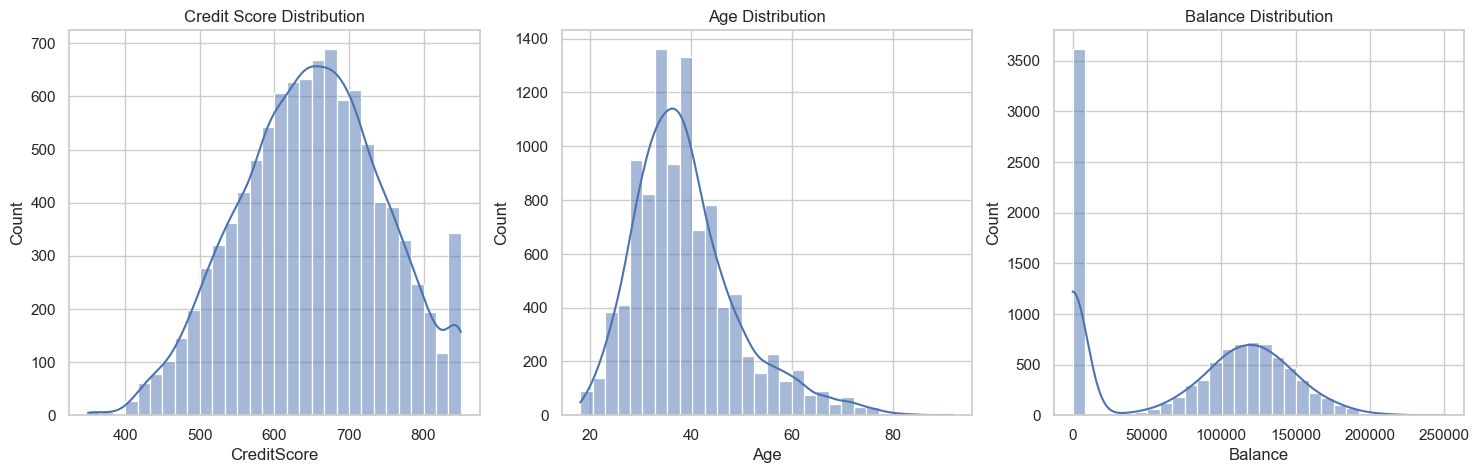

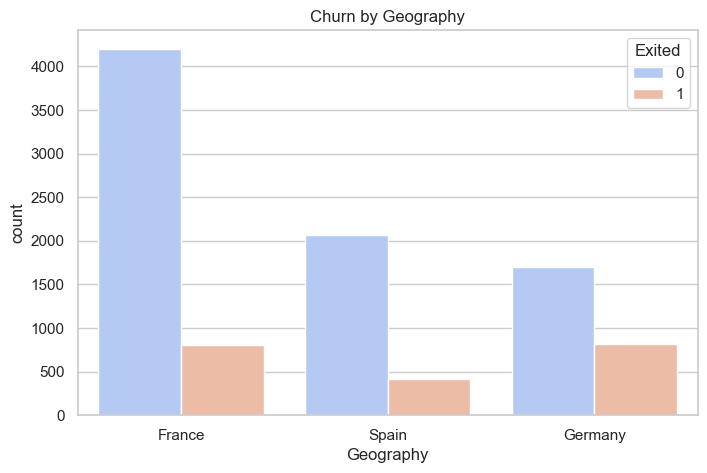

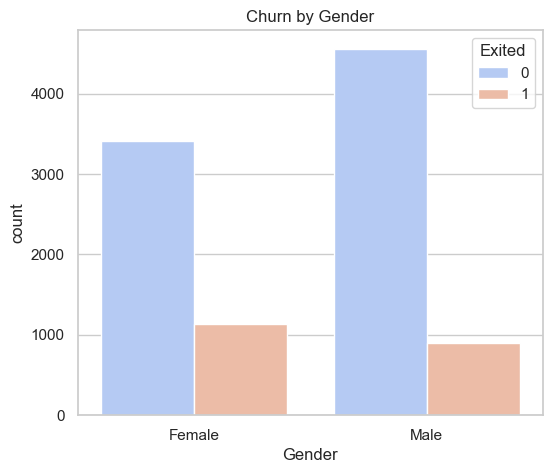

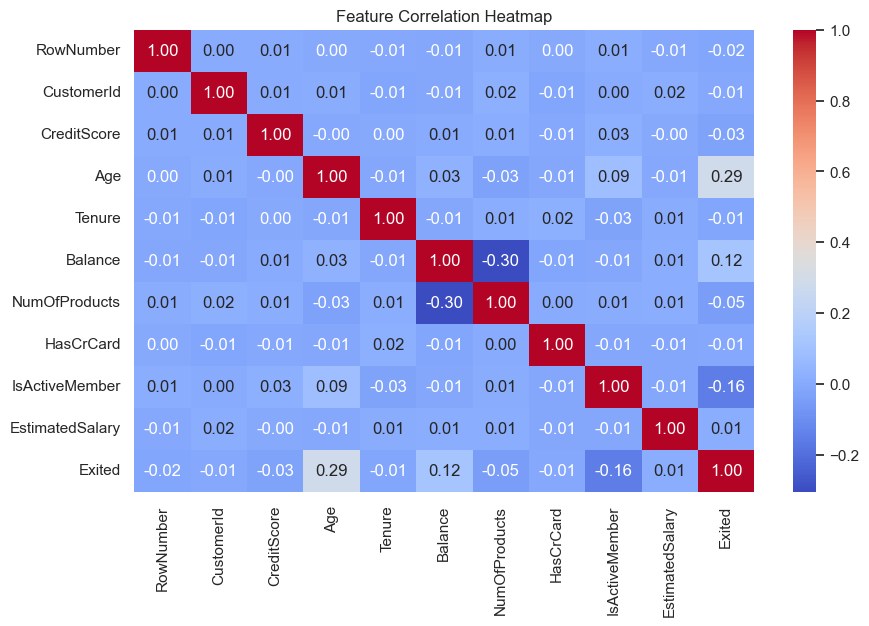

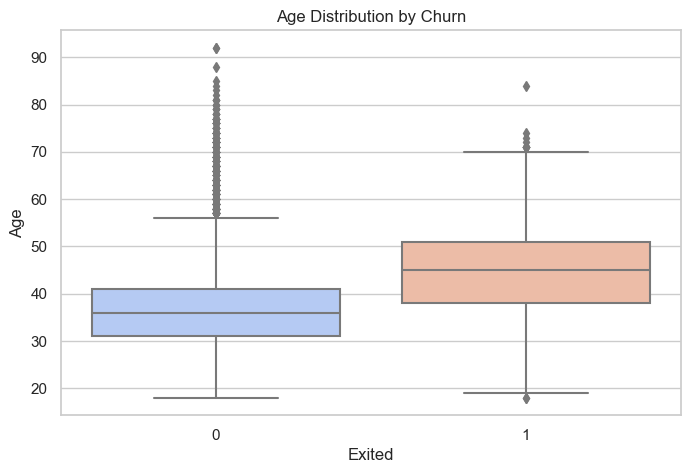

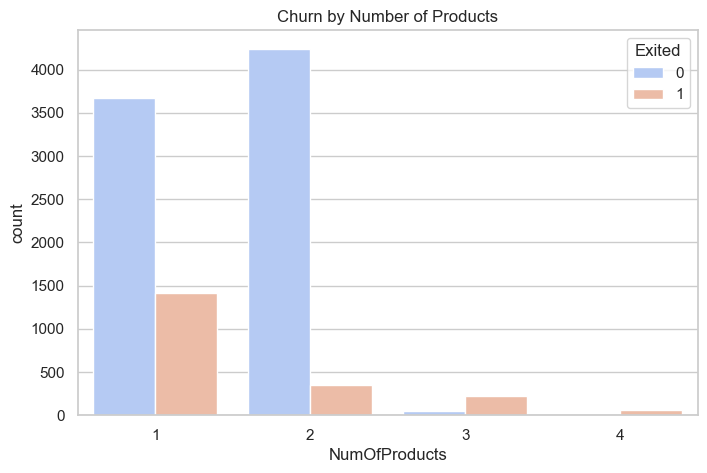

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")
# 1. Distribution of Credit Score, Age, and Balance
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df['CreditScore'], bins=30, kde=True, ax=axes[0])
axes[0].set_title("Credit Score Distribution")

sns.histplot(df['Age'], bins=30, kde=True, ax=axes[1])
axes[1].set_title("Age Distribution")

sns.histplot(df['Balance'], bins=30, kde=True, ax=axes[2])
axes[2].set_title("Balance Distribution")

plt.show()

# 2. Churn rate by Geography
plt.figure(figsize=(8, 5))
sns.countplot(x='Geography', hue='Exited', data=df, palette="coolwarm")
plt.title("Churn by Geography")
plt.show()

# 3. Churn rate by Gender
plt.figure(figsize=(6, 5))
sns.countplot(x='Gender', hue='Exited', data=df, palette="coolwarm")
plt.title("Churn by Gender")
plt.show()

# 4. Convert categorical columns to numeric where necessary
df_numeric = df.select_dtypes(include=['number'])  # Select only numeric columns

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# 5. Boxplot of Age vs. Churn
plt.figure(figsize=(8, 5))
sns.boxplot(x="Exited", y="Age", data=df, palette="coolwarm")
plt.title("Age Distribution by Churn")
plt.show()

# 6. Churn by Number of Products
plt.figure(figsize=(8, 5))
sns.countplot(x="NumOfProducts", hue="Exited", data=df, palette="coolwarm")
plt.title("Churn by Number of Products")
plt.show()

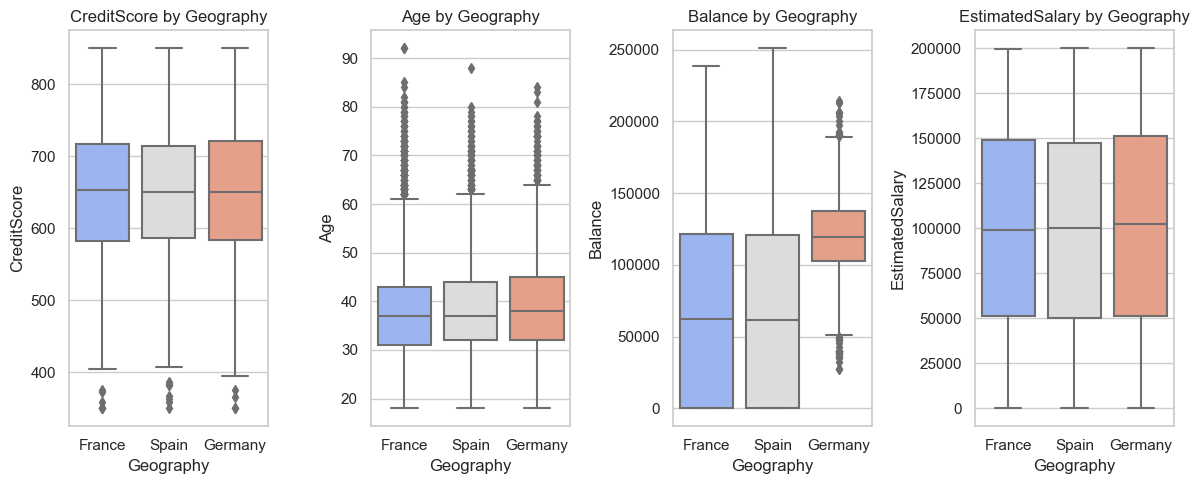

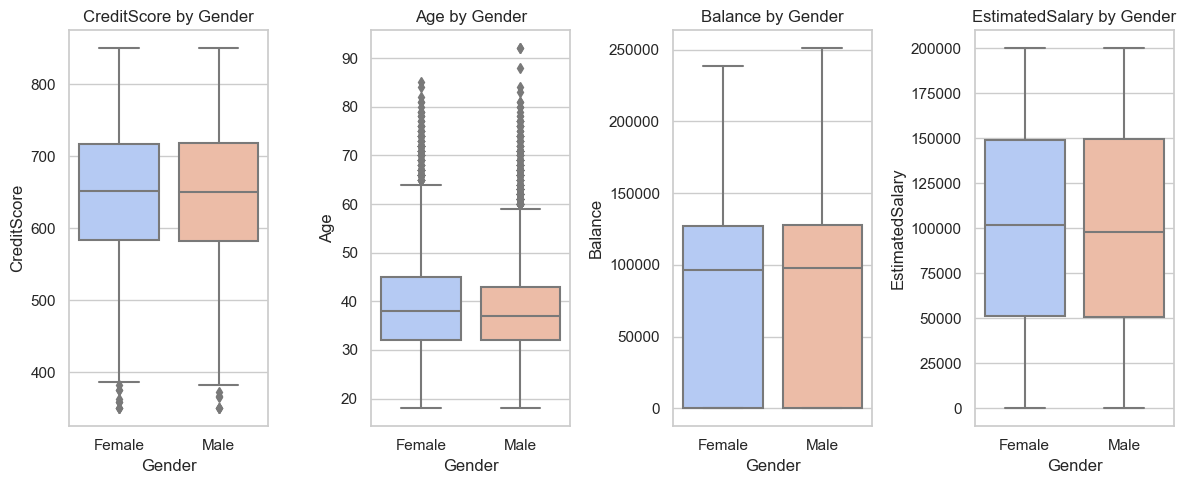

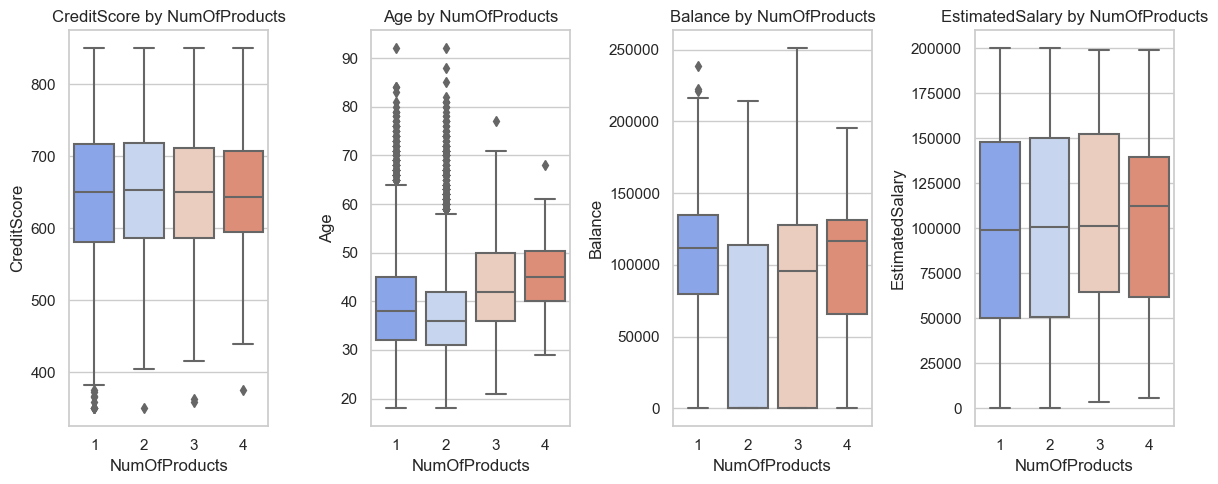

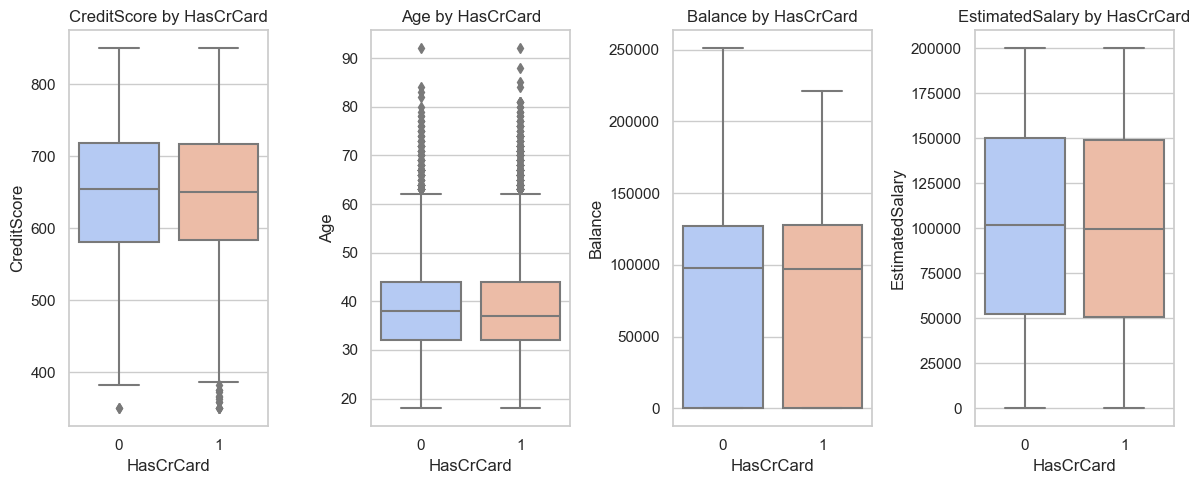

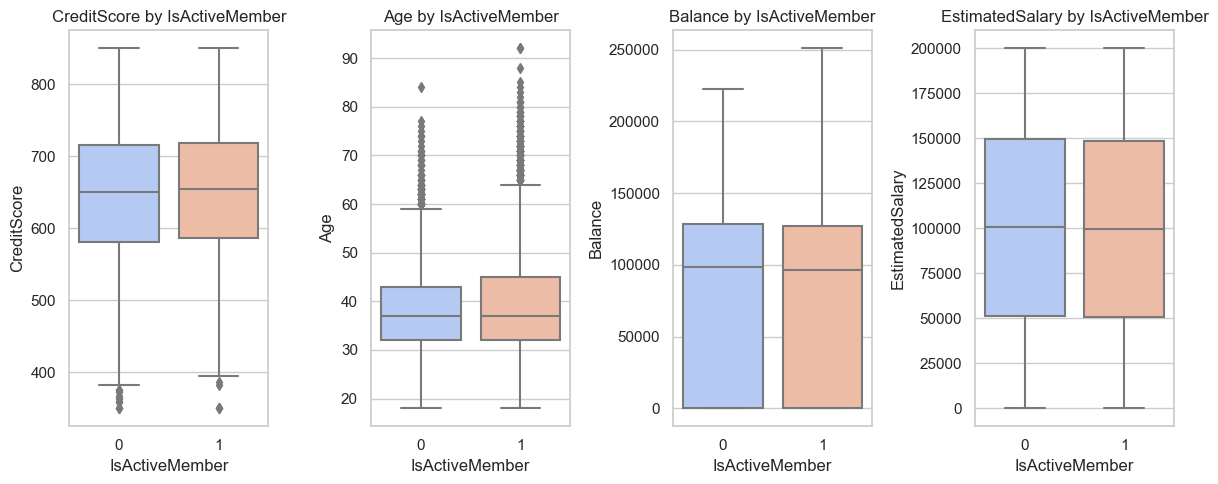

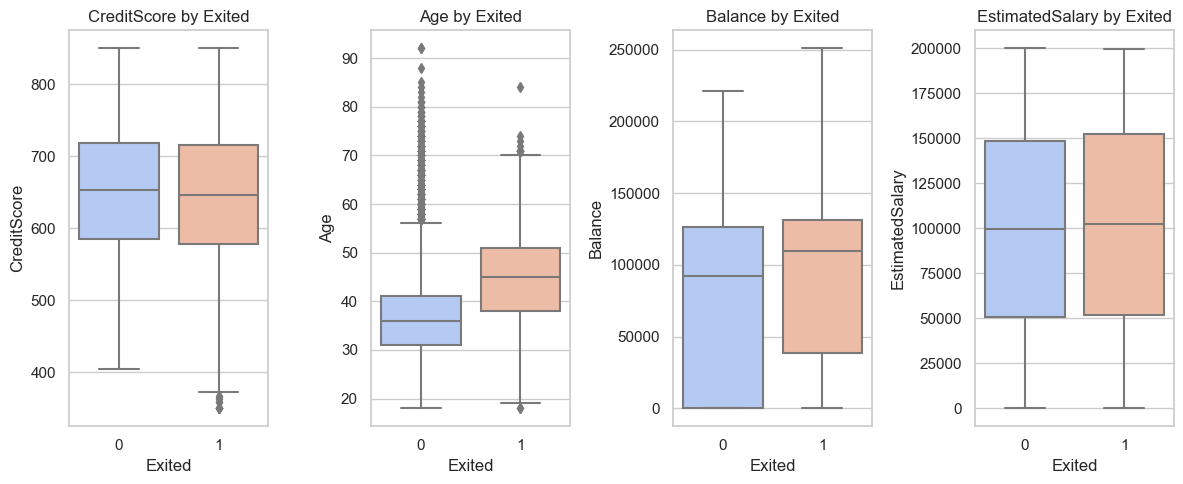

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/Users/JumpMan/Downloads/Python Project/Employee_deep_learning/Churn_Modelling.csv"  # Replace with actual file path
df = pd.read_csv(file_path)

# Define categorical columns to visualize
categorical_vars = ["Geography", "Gender", "NumOfProducts", "HasCrCard", "IsActiveMember", "Exited"]

# Define numerical variables for box plots
numerical_vars = ["CreditScore", "Age", "Balance", "EstimatedSalary"]

# Create box plots for each categorical variable
for cat_var in categorical_vars:
    plt.figure(figsize=(12, 5))
    for i, num_var in enumerate(numerical_vars):
        plt.subplot(1, len(numerical_vars), i+1)
        sns.boxplot(x=df[cat_var], y=df[num_var], palette="coolwarm")
        plt.title(f"{num_var} by {cat_var}")
    plt.tight_layout()
    plt.show()


In [27]:
df.Geography.value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

## Building an Artificial Neural Network

In [31]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load dataset
file_path = "/Users/JumpMan/Downloads/Python Project/Employee_deep_learning/Churn_Modelling.csv"  # Replace with actual path
df = pd.read_csv(file_path)

# Drop unnecessary columns
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis=1)

# Encode categorical variables
label_encoders = {}
for col in ["Geography", "Gender"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save encoders if needed for future use

# Define features and target
X = df.drop("Exited", axis=1).values
y = df["Exited"].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the ANN model
model = Sequential([
    Dense(16, activation="relu", input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(8, activation="relu"),
    Dropout(0.2),
    Dense(1, activation="sigmoid")  # Sigmoid for binary classification
])

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")


/Users/JumpMan/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4598 - loss: 0.7891 - val_accuracy: 0.8025 - val_loss: 0.4958
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7887 - loss: 0.5189 - val_accuracy: 0.8065 - val_loss: 0.4465
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7934 - loss: 0.4781 - val_accuracy: 0.8165 - val_loss: 0.4246
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8044 - loss: 0.4568 - val_accuracy: 0.8190 - val_loss: 0.4128
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8041 - loss: 0.4568 - val_accuracy: 0.8265 - val_loss: 0.4052
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8170 - loss: 0.4313 - val_accuracy: 0.8295 - val_loss: 0.3981
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8162 - loss: 0.4384 - val_accuracy: 0.8380 - val_loss: 0.3938
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8310 - loss: 0.4184 - val_accuracy: 0.

### Hyperparameter Tuning

In [32]:
from tensorflow.keras.layers import BatchNormalization

# Build optimized ANN model
model_opt = Sequential([
    Dense(32, activation="relu", input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(16, activation="relu"),
    BatchNormalization(),
    Dropout(0.3),

    Dense(8, activation="relu"),
    BatchNormalization(),
    Dropout(0.2),

    Dense(1, activation="sigmoid")  # Binary output
])

# Compile model with different optimizer
model_opt.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train the model
history_opt = model_opt.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test))

# Evaluate model performance
test_loss, test_acc = model_opt.evaluate(X_test, y_test)
print(f"Optimized Test Accuracy: {test_acc:.2f}")


Epoch 1/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5833 - loss: 0.8023 - val_accuracy: 0.8010 - val_loss: 0.5457
Epoch 2/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7066 - loss: 0.5987 - val_accuracy: 0.8200 - val_loss: 0.4773
Epoch 3/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7740 - loss: 0.5320 - val_accuracy: 0.8230 - val_loss: 0.4372
Epoch 4/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7794 - loss: 0.4974 - val_accuracy: 0.8290 - val_loss: 0.4128
Epoch 5/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7968 - loss: 0.4736 - val_accuracy: 0.8305 - val_loss: 0.3986
Epoch 6/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8036 - loss: 0.4517 - val_accuracy: 0.8370 - val_loss: 0.3863
Epoch 7/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8107 - loss: 0.4418 - val_accuracy: 0.8430 - val_loss: 0.3778
Epoch 8/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8125 - loss: 0.4314 - val_accu

### Visaulizing training history

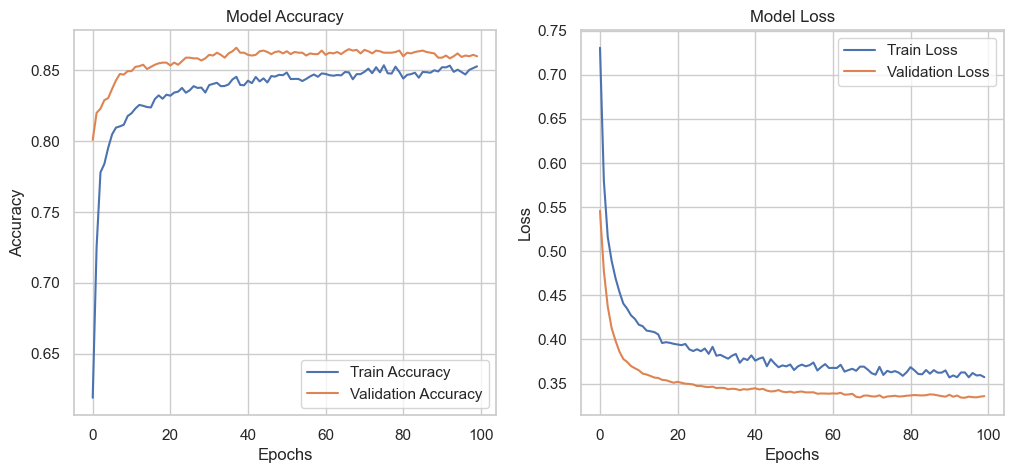

In [33]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_opt.history["accuracy"], label="Train Accuracy")
plt.plot(history_opt.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Model Accuracy")

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_opt.history["loss"], label="Train Loss")
plt.plot(history_opt.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Model Loss")

plt.show()


### Making Predictions

In [40]:
# Predict churn probability
prob = model_opt.predict(new_customer)[0][0]

# Confidence Levels
if prob > 0.75:
    prediction = "Highly Likely to Churn"
elif prob > 0.5:
    prediction = "Moderately Likely to Churn"
elif prob > 0.25:
    prediction = "Unlikely to Churn"
else:
    prediction = "Highly Unlikely to Churn"

print(f"Churn Probability: {prob:.4f} -> Prediction: {prediction}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Churn Probability: 0.0813 -> Prediction: Highly Unlikely to Churn


In [41]:
threshold = 0.6  # Adjust threshold for stricter classification

prob = model_opt.predict(new_customer)[0][0]
prediction = "Will Churn" if prob > threshold else "Will Stay"

print(f"Churn Probability: {prob:.4f} (Threshold: {threshold}) -> Prediction: {prediction}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Churn Probability: 0.0813 (Threshold: 0.6) -> Prediction: Will Stay


In [42]:
# Simulated new customers (replace with real data)
new_customers = np.array([
    [750, 0, 1, 30, 5, 70000, 1, 1, 0, 120000],  # Low-risk
    [600, 1, 0, 50, 3, 20000, 2, 0, 1, 50000],  # High-risk
    [680, 0, 1, 40, 2, 45000, 2, 1, 1, 80000],  # Medium-risk
])

# Scale the data
new_customers_scaled = scaler.transform(new_customers)

# Predict probabilities
probs = model_opt.predict(new_customers_scaled)

# Print results
for i, prob in enumerate(probs):
    prediction = "Will Churn" if prob[0] > 0.5 else "Will Stay"
    print(f"Customer {i+1}: Probability = {prob[0]:.4f} -> Prediction: {prediction}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
Customer 1: Probability = 0.1053 -> Prediction: Will Stay
Customer 2: Probability = 0.0960 -> Prediction: Will Stay
Customer 3: Probability = 0.0310 -> Prediction: Will Stay
